# Hierarchical Clustering

Hierarchical clustering is a type of unsupervised learning algorithm used to build a hierarchy of clusters. Unlike other clustering techniques, it doesn't require the number of clusters to be specified in advance. There are two main types of hierarchical clustering:

*   Agglomerative Hierarchical Clustering (Bottom-Up)   
*   Divisive Hierarchical Clustering (Top-Down)

**Agglomerative Hierarchical Clustering (Bottom-Up)**

---


*   *Process:*   
    *   Start: Treat each data point as its own individual cluster.
    *   Merge: At each step, merge the two closest clusters based on a distance metric (e.g., Euclidean distance, Manhattan distance).
    *   Repeat: Continue merging until all data points are combined into a single cluster or until a desired number of clusters is reached.
*   *Result:*   
The process produces a tree-like structure called a dendrogram. By cutting the dendrogram at a certain level, you can choose the number of clusters.




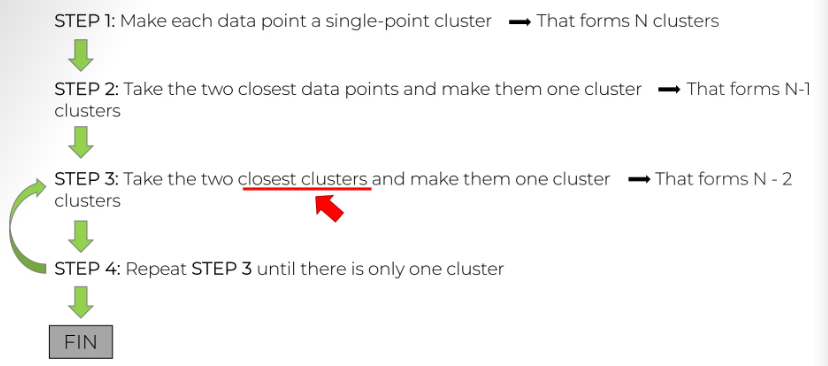

***DENDOGRAMS***

A dendrogram is a tree-like diagram used to illustrate the arrangement of the clusters produced by hierarchical clustering. It visually represents how clusters are formed by successively merging or splitting data points or clusters.

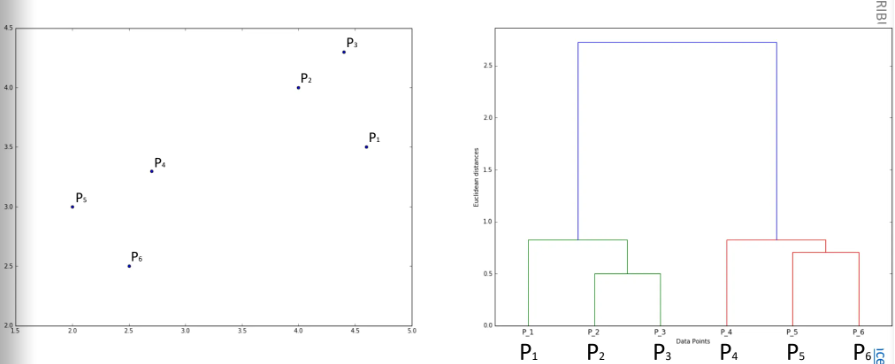

***How to identify optimal number of clusters***



*   *Examine the Dendrogram:*   
    *   After performing hierarchical clustering, you will obtain a dendrogram that shows how clusters are merged at various levels of similarity.
    *   The vertical axis (height) represents the distance or dissimilarity at which clusters are merged.
    


*   *Look for Large Vertical Gaps:*   
    *   In the dendrogram, identify the largest vertical gaps between horizontal lines. These gaps indicate that merging the clusters at these points would result in a significant loss of information.
    *   A large vertical gap suggests a natural division between clusters.
    *    Cut the dendrogram horizontally at a point just below this large gap. The number of clusters is equal to the number of vertical lines intersected by this horizontal cut.

*   *Count the Number of Clusters:*   
    *   The number of clusters is determined by counting the number of vertical lines (branches) that intersect with the horizontal cut.





## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

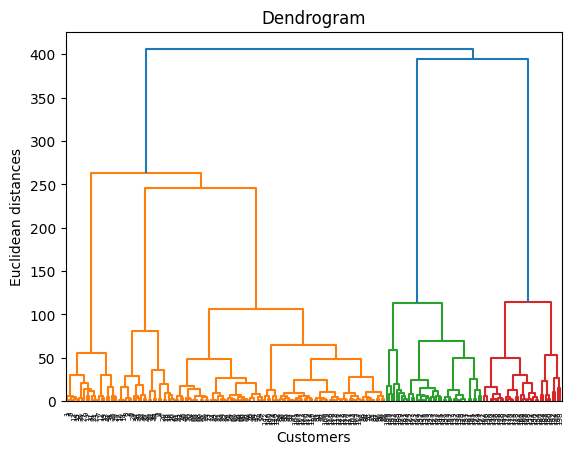

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualising the clusters

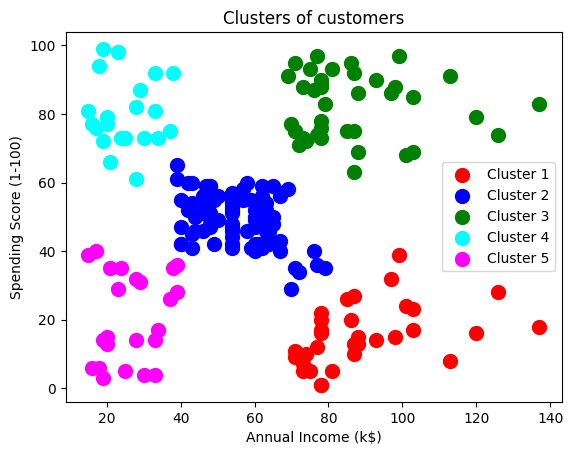

In [7]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()